<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Unsupervised%20Learning/K-Means%20Clustering/USL_KMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Importing Required Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Step 2: Loading the Dataset

In [ ]:
#Dataset "customer_data.csv" with columns: 'CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
data = pd.read_csv("Mall_Customers.csv.xls")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
data.shape

(200, 5)

## Step 3: Data Cleaning and Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Feature selection for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3: Determine the Optimal Number of Clusters

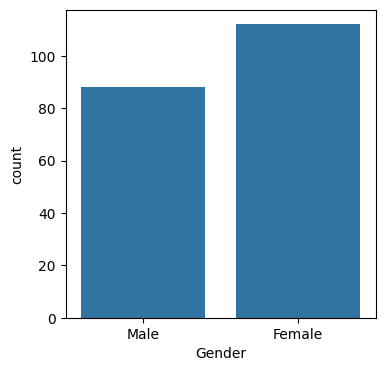

In [ ]:
# Plotting Number of Male Vs Female Customers
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=data)
plt.show()

<ipython-input-37-579d9ba490f8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins=10)
<ipython-input-37-579d9ba490f8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x] , bins=10)
<ipython-input-37-579d9ba490f8>:8: UserWarning: 

`distplot` is a deprecated function and will b

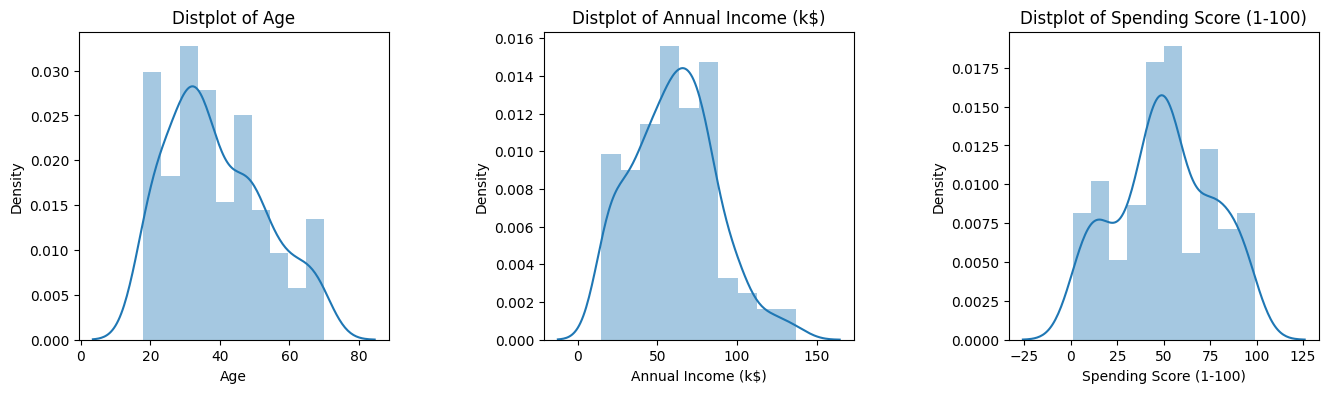

In [ ]:
#Distribution of numerical features (Age, Annual income & Spending score)
plt.figure(1, figsize=(16,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

<Figure size 1600x1000 with 0 Axes>

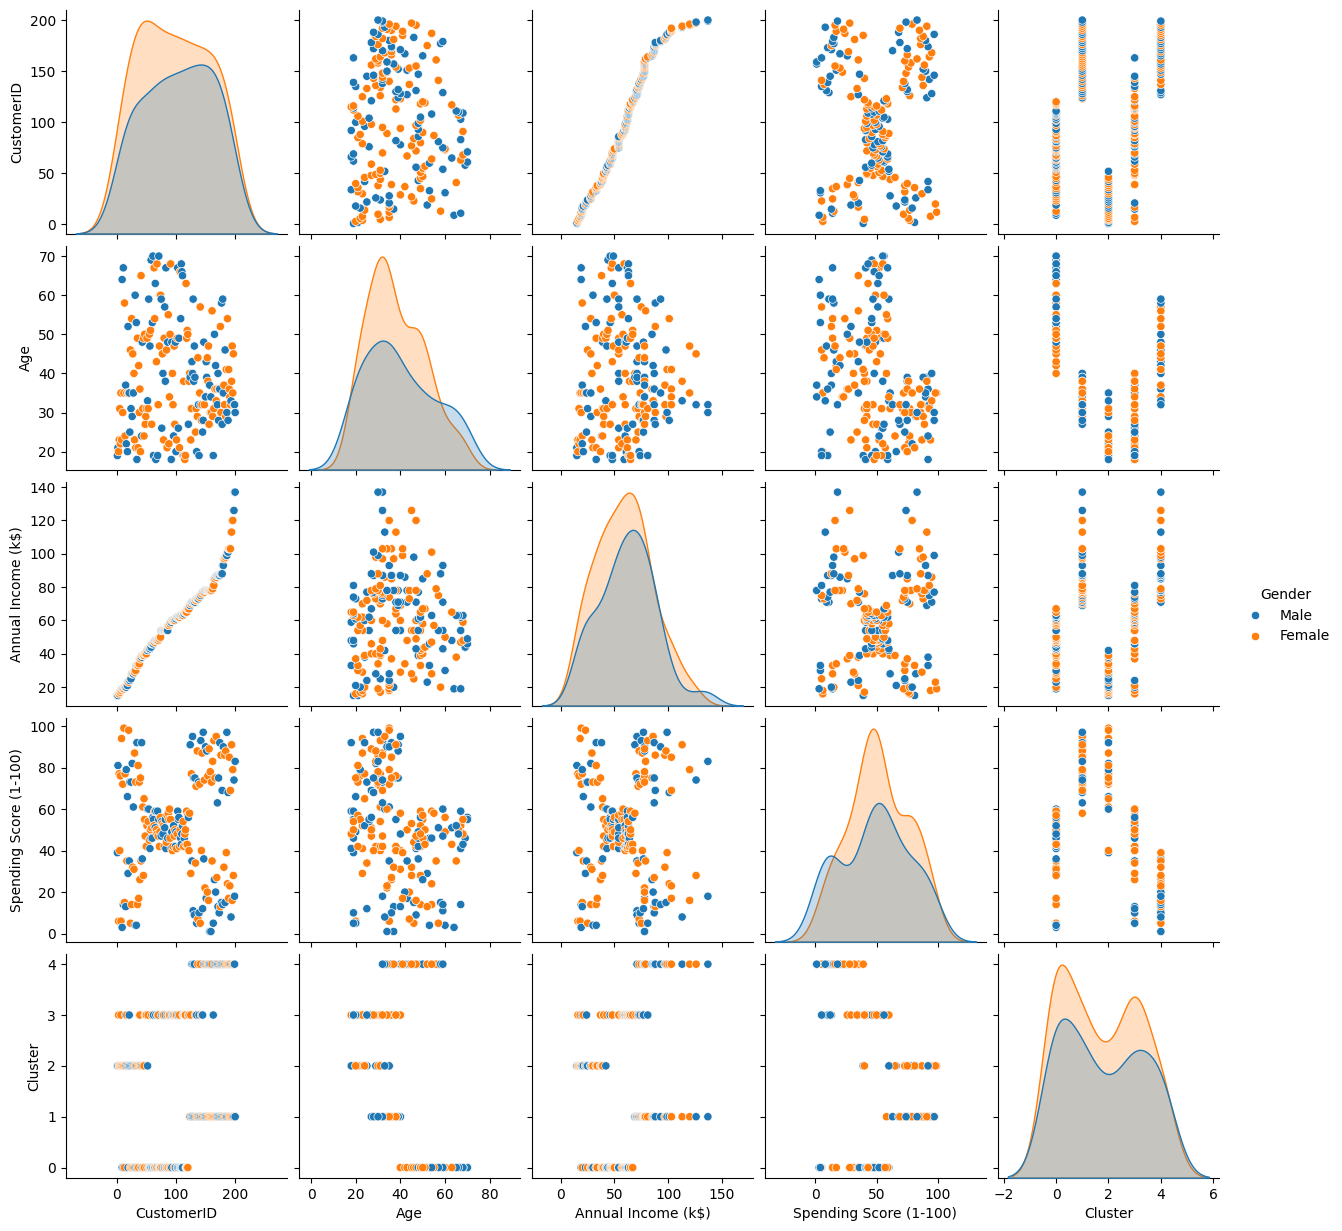

In [ ]:
# Plotting pairwise relationships between features in a dataset.
plt.figure(1, figsize=(16,10))
sns.pairplot(data=data, hue='Gender')
plt.show()

In [ ]:
# Based on the Elbow Curve, let's choose k=5
optimal_k = 5

## Step 5: Applying & Visualizing K-Means Clustering

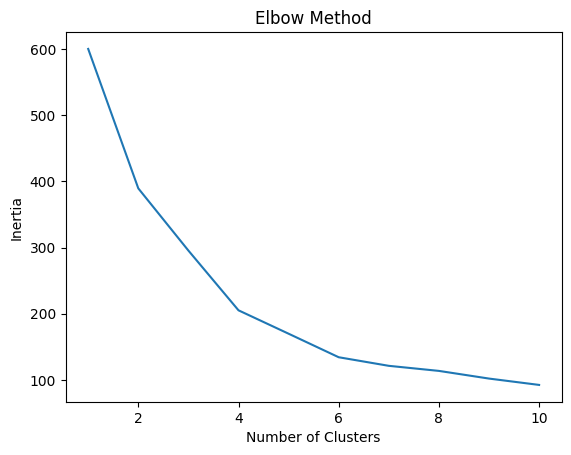

In [ ]:
km_inertias, km_scores = [], []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    km_inertias.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure()
plt.plot(k_range, km_inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
X = data.iloc[:, -2]

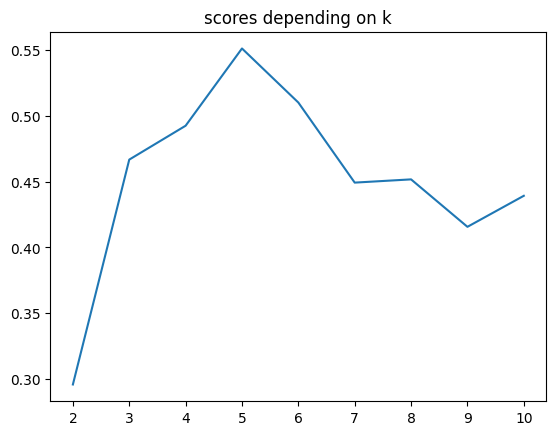

In [ ]:
sns.lineplot(x=range(2, 11), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [ ]:
X = data.iloc[:, -3:]

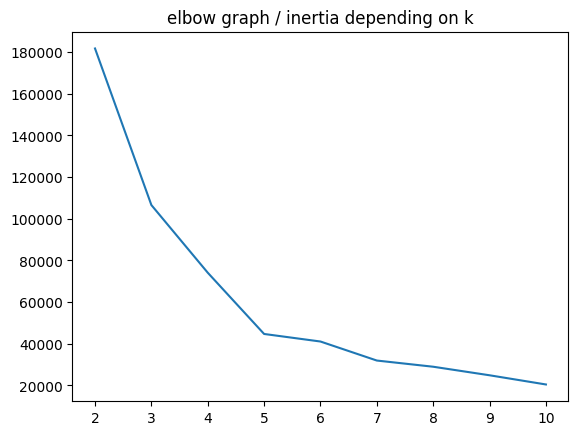

In [ ]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))

sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

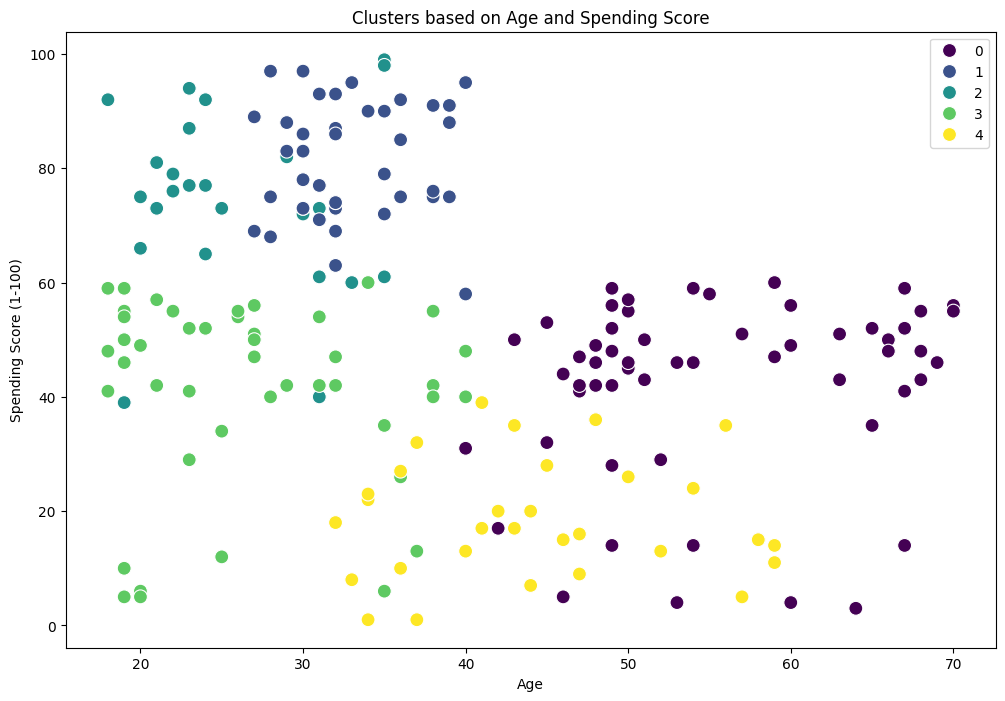

In [ ]:
# 2D Scatter Plot for Age vs Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Clusters based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

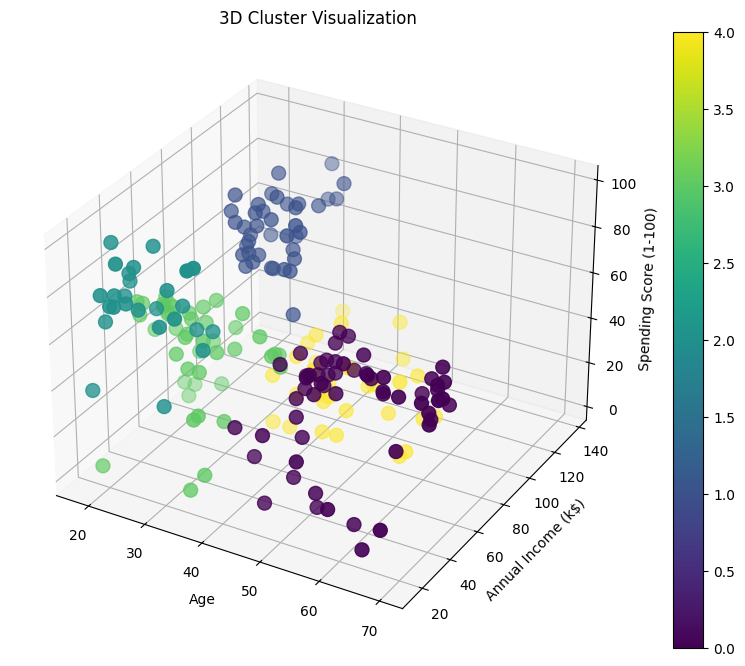

In [ ]:
# 3D Scatter Plot for Age, Annual Income, and Spending Score
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=100)
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.show()

## Step 6: Performance & Error Analysis

In [ ]:
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.41


In [ ]:
X = data.iloc[:, -3:]
# Profiles of customers
X['label'] = km.labels_

In [ ]:
X.label.value_counts()

,count
label,
8,43
0,40
6,25
1,22
5,21
7,13
2,12
3,11
4,10


In [ ]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
       Annual Income (k$)  Spending Score (1-100)  Cluster
count                40.0                  40.000     40.0
mean                 48.1                  52.675      1.2
min                  39.0                  41.000      0.0
max                  58.0                  65.000      3.0



cluster nb : 1
       Annual Income (k$)  Spending Score (1-100)    Cluster
count           22.000000               22.000000  22.000000
mean            80.181818               12.681818   3.818182
min             71.000000                1.000000   3.000000
max             93.000000               27.000000   4.000000



cluster nb : 2
       Annual Income (k$)  Spending Score (1-100)  Cluster
count           12.000000               12.000000    12.00
mean            24.583333                9.583333     0.75
min             16.000000                3.000000     0.00
max             34.000000               17.000000     3.00



cluster nb : 3
       Annual Income (k$)  Spending 

In [ ]:
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Annual Income (k$),Spending Score (1-100),Cluster
count,22.000000,22.000000,22.000000
mean,80.181818,12.681818,3.818182
min,71.000000,1.000000,3.000000
max,93.000000,27.000000,4.000000


In [ ]:
output_file = "customer_clusters.csv"
data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")

Clustered data saved to customer_clusters.csv


The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:

- Cluster 1. Customers with medium annual income and medium annual spend
- Cluster 2. Customers with high annual income and high annual spend
- Cluster 3. Customers with low annual income and low annual spend
- Cluster 4. Customers with high annual income but low annual spend
- Cluster 5. Customers low annual income but high annual spend

Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers and maintain their satisfaction.

We have thus seen, how we could arrive at meaningful insights and recommendations by using clustering algorithms to generate customer segments. For the sake of simplicity, the dataset used only 2 variables — income and spend. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.